# Customer Segmentation 


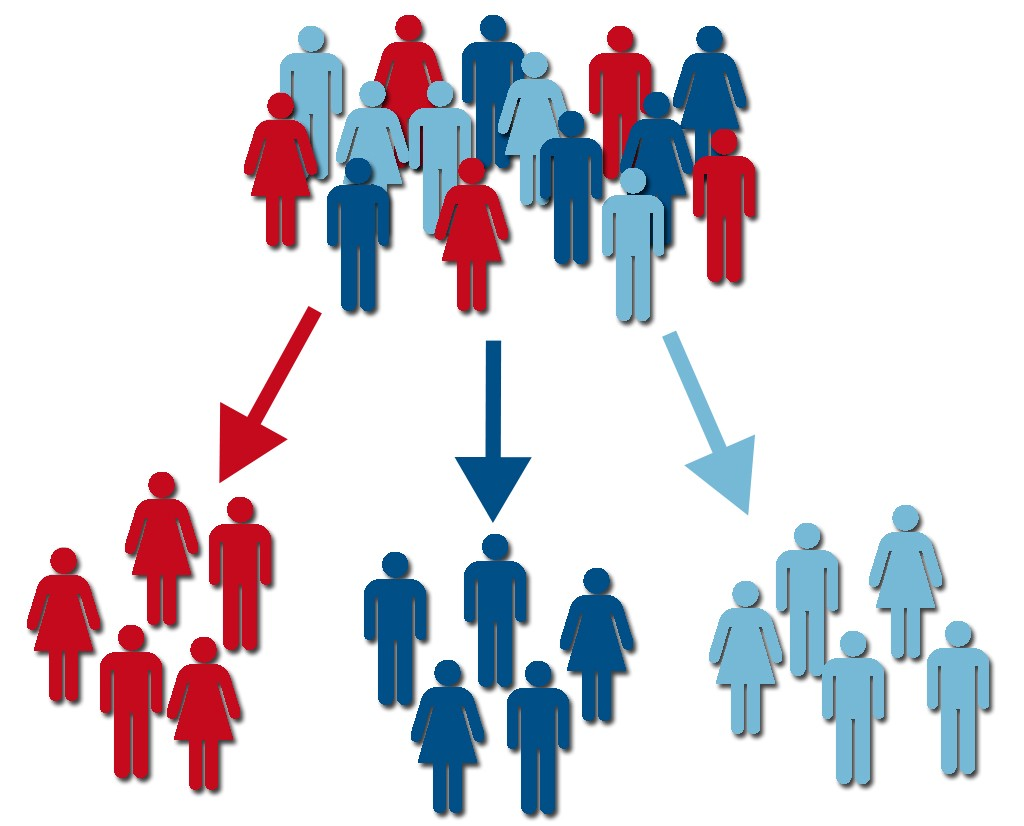


# **Introduction**
***

Customer clustering analysis is the use of a mathematical model to discover groups of similar customers based on finding the smallest variations among customers within each group. These homogeneous groups are known as “customer archetypes” or “personas”.


## **Overview**
***
### **Problem Statement**

 In order to comprehend the behavior of their customers, I will analyze the customer data from a retail company. Hopefully, a wealth of information will be uncovered that will assist the business in planning its upcoming campaigns by identifying the most valuable clients and identifying the target market for a new product.

### **Success Metrics**
***
Achieving clusters with profiles that are cohesive to the EDA done on the dataset

### **Context**
***
The dataset holds data from a marketing campaign and was collected between 2012 and 2014. The data has customer behavioral data for a retail outlet.


#### **Relevance and Validation**
***
The original dataset, that can be found in  <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis"> this kaggle dataset</a>. It contains information of 2240 customers, with 29 attributes each. These attributes are: 
 
#### **Column Descriptions**
***
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


>[Customer Segmentation](#scrollTo=ZykzNH3C4VXS)

>[Introduction](#scrollTo=K3uPnwgHv0PT)

>>[Overview](#scrollTo=K3uPnwgHv0PT)

>>>[Problem Statement](#scrollTo=K3uPnwgHv0PT)

>>>[Success Metrics](#scrollTo=K3uPnwgHv0PT)

>>>[Context](#scrollTo=K3uPnwgHv0PT)

>>>>[Relevance and Validation](#scrollTo=K3uPnwgHv0PT)

>>>>[Column Descriptions](#scrollTo=K3uPnwgHv0PT)

>[Importation of libraries](#scrollTo=gNxk06QXv0Pc)

>>[Loading the data](#scrollTo=W47tFfUu1bLB)

>[Data Cleaning](#scrollTo=k6p5-YWwv0Pf)

>>[Feature Engineering](#scrollTo=ueG_eAhf76_8)

>[Exploratory Data Analaysis](#scrollTo=f4gDz9wB-duY)

>[Data Preprocessing](#scrollTo=2qV60x8GVMu5)

>>[Scaling data](#scrollTo=sg6-DcV8VKgT)

>[Principal Components Analysis (PCA)](#scrollTo=1OzGsUAov0Pk)

>[K-Means](#scrollTo=15c5kEMZv0Pl)

>>[Cluster Analysis](#scrollTo=ZQIgKbvev0Pm)

>>>[Notes:](#scrollTo=89S2AznDv0Po)

>>>>>[Income:](#scrollTo=89S2AznDv0Po)

>>>>[Total Spent:](#scrollTo=89S2AznDv0Po)

>>>>[Percentage of Items bought with discount:](#scrollTo=89S2AznDv0Po)

>>>>[Percentage of essential items bought:](#scrollTo=89S2AznDv0Po)

>>>>[Age:](#scrollTo=89S2AznDv0Po)

>[Conclusions:](#scrollTo=1cocUP5Yv0Po)

>>>[Cluster 1:](#scrollTo=1cocUP5Yv0Po)

>>>[Cluster 2:](#scrollTo=1cocUP5Yv0Po)

>>>[Cluster 3:](#scrollTo=1cocUP5Yv0Po)

>>[Challenges](#scrollTo=9JPbZBnrApbD)



# **Importation of libraries**
***

In [1]:
# Importing
import pandas as pd 
import numpy as np
from datetime import datetime

# visualization libraries
import seaborn as sns  
import matplotlib.pyplot as plt

# machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

%matplotlib inline

## Loading the data

In [2]:
# Reading the data
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')

# Renaming columns
df.columns = ['customer_id','birth_year', 'education', 'marital_status', 'income', 'kid_home','teen_home','dt_customer', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat', 'mnt_fish', 'mtn_sweet', 'mnt_gold', 'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'accepted_cpm3', 'accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2',  'complain', 'z_cost_contact', 'z_revenue', 'response']

# Previewing the dataset
display(df.head(10))




,customer_id,birth_year,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [87]:
# Shape of dataset
print('Number of rows    : ', df.shape[0])
print('Number of columns : ', df.shape[1])

Number of rows    :  2236
Number of columns :  13


# **Data Cleaning** 
***

1. creating new features from the dataset, 
2. removal of outliers, 
3. clean nulls or imputing where possible, 
4. change some categorical data.





In [4]:
# Finding null values with the mean
display(df.isnull().sum())



customer_id               0
birth_year                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

Only the income column has missing values, and they are 24.

In [5]:
# imputing mean to the income column

df = df.fillna(df['income'].mean())

assert (df.isnull().sum().sum() == 0)

  Decided to impute in order to preserve all data points for the clustering.
  

In [6]:
# looking for duplicated rows
df.duplicated().sum()

0

No duplicates in the dataset


## **Feature Engineering**


In [7]:
# Feature engineering: 
# Developing new, wholesome features

# Developing a feature with the total spent for the client
df['total_spent'] = df['mnt_wines']  + df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'] + df['mnt_gold']

# Developing a feature with the % of money spent on essential item (food-related) 
df['pct_essentials'] = (df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'])/df['total_spent']

# Developing a feature with the number of purchases for each client
df['num_purchases'] = df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases'] + df['num_web_visits_month']

# Developing a feature with the number of children
df['num_children'] = df['kid_home'] + df['teen_home']



# Developing a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['num_deals_purchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)

# Developing a feature with the age of the client
# Age of the customer today
df['age'] =  2022 - df['birth_year']

Developing a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date.

In [8]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'])
dates = []
for i in df["dt_customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [9]:
# Developing a feature "Customer_For"
df['customer_for'] = ((datetime(2014,12,6) - df['dt_customer']).dt.days)

In [10]:
# Group some categories that have a similar meaning 
# Segmenting marital_status in two groups
df['relationship'] = df['marital_status'].replace({'Married':'Partner','Together':'Partner',
                            'Single':'Alone', 'Divorced':'Alone', 'Widow':'Alone', 'Alone':'Alone', 'Absurd':'Alone','YOLO':'Alone'})

# Segmenting education levels in three groups
df["education"] = df["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [11]:
#Feature for total members in the householde
df["family_size"] = df["relationship"].replace({"Alone": 1, "Partner":2})+ df["num_children"]

In [12]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.num_children> 0, 1, 0)

# **Exploratory Data Analysis**

In [13]:
df.describe()

,customer_id,birth_year,income,kid_home,teen_home,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,...,response,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,customer_for,family_size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.149107,605.798214,0.421322,17.853571,0.950446,0.136315,53.194196,512.043304,2.595089,0.715179
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.356274,602.249288,0.194031,6.550998,0.751803,0.094969,11.984069,232.229893,0.906959,0.451430
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.027523,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,68.750000,0.263311,12.000000,0.000000,0.066667,45.000000,340.750000,2.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,396.000000,0.429356,17.000000,1.000000,0.111111,52.000000,513.000000,3.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,63.000000,685.250000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,129.000000,1063.000000,5.000000,1.000000


In [14]:
# Removing outliers
df = df[(df['age'] < 90) & (df['income'] < 600000)].reset_index(drop = True)

print("The new dataset have {} rows.".format(df.shape[0]))

The new dataset have 2236 rows.


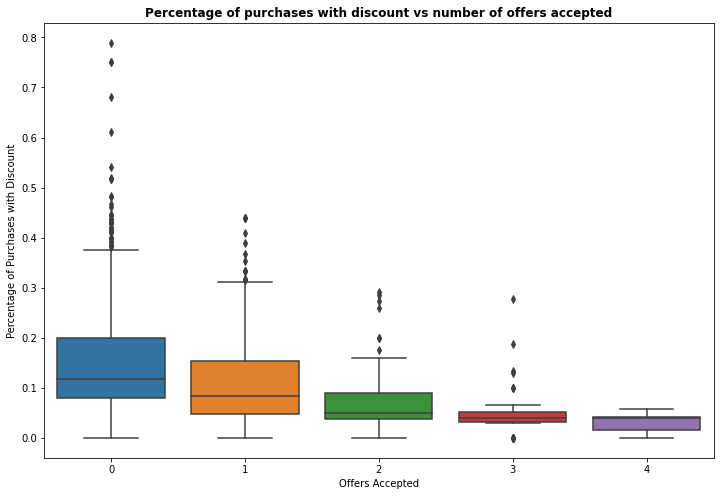

In [15]:
# checking the relationship between the "offers accepted", and the "percentage of purchases with discount"
df['accepted_sum'] = df['accepted_cpm3']+df['accepted_cpm4']+ df['accepted_cpm5'] + df['accepted_cpm1'] +df['accepted_cpm2']
plt.figure(figsize = (12,8))
plt.title('Percentage of purchases with discount vs number of offers accepted', fontweight = 'bold')
sns.boxplot(data = df, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentage of Purchases with Discount');

From the visualization above, there seems to be an opposite correlation between the number of offers and the sales. It can be viewed that the more offers accepted, the less the sales.This seems incongruent. But there might be various factores contributing such as many paeole did not see all the offers

In [16]:
### Droping columns: Since we are going to use perform clusterization ahead, it's important that we only keep the 
### most important features, since we don't want the clusters to be created based on attributes that 
### are not that important to us



df = df.drop(['num_web_visits_month','recency', 'complain', 'response', 'customer_id','dt_customer',
              'birth_year','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish', 
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)


In [17]:
df.head()

,education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,customer_for,relationship,family_size,Is_Parent
0,Graduate,58138.0,3,1617,0.552876,29,0,0.103448,65,971,Alone,1,0
1,Graduate,46344.0,2,27,0.370370,9,2,0.222222,68,125,Alone,3,1
2,Graduate,71613.0,1,776,0.396907,24,0,0.041667,57,472,Partner,2,0
3,Graduate,26646.0,2,53,0.698113,12,1,0.166667,38,65,Partner,3,1
4,Postgraduate,58293.0,5,422,0.554502,19,1,0.263158,41,321,Partner,3,1


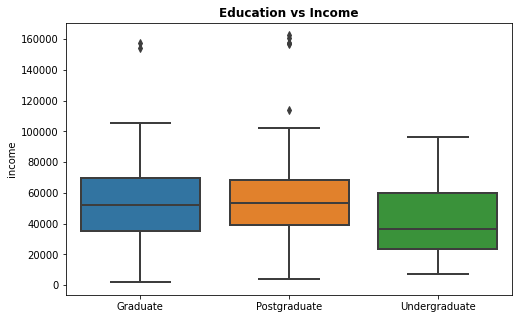

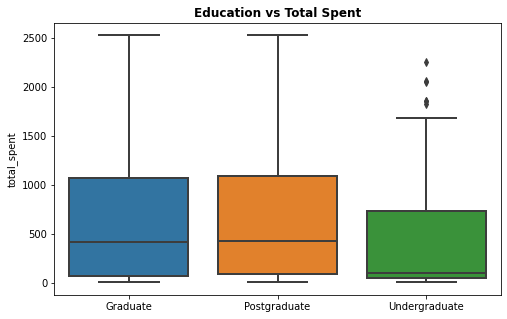

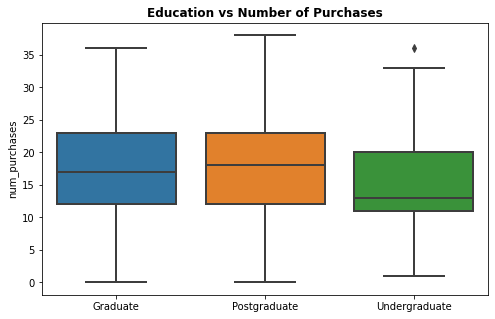

In [18]:
# Purchase behaviour vs Education
plt.figure(figsize = (8,5))
plt.title("Education vs Income", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['income'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Total Spent", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['total_spent'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Number of Purchases", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['num_purchases'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

Graduates and postgraduates exhibit remarkably similar buying patterns.I'll classify them as belonging to the same group as a result of the observation.

In [19]:
df["education"] = df["education"].replace({'Graduate':'Postgraduate'})



***

Examining the distributions of the remaining features, their interactions, and their relationships.

In [20]:
# Some descriptive statistics
df.describe()

,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,customer_for,family_size,Is_Parent
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51961.906544,2.326029,605.986583,0.421153,17.865385,0.950805,0.136283,53.101968,512.179785,2.595707,0.715116
std,21411.404811,1.933032,601.865156,0.194116,6.549638,0.752204,0.094970,11.703281,232.311073,0.907468,0.451460
min,1730.000000,0.000000,5.000000,0.027523,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000
25%,35502.500000,1.000000,69.000000,0.263047,12.000000,0.000000,0.066667,45.000000,340.750000,2.000000,0.000000
50%,51684.000000,2.000000,396.500000,0.428571,17.000000,1.000000,0.111111,52.000000,513.000000,3.000000,1.000000
75%,68275.750000,3.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,63.000000,686.000000,3.000000,1.000000
max,162397.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,82.000000,1063.000000,5.000000,1.000000


In [21]:
# creating an auxiliary column, for visualization. It will be deleted afterwards.
df['age_group'] = df['age']//10*10

cat_columns = ['education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'customer_for', 'pct_essentials']

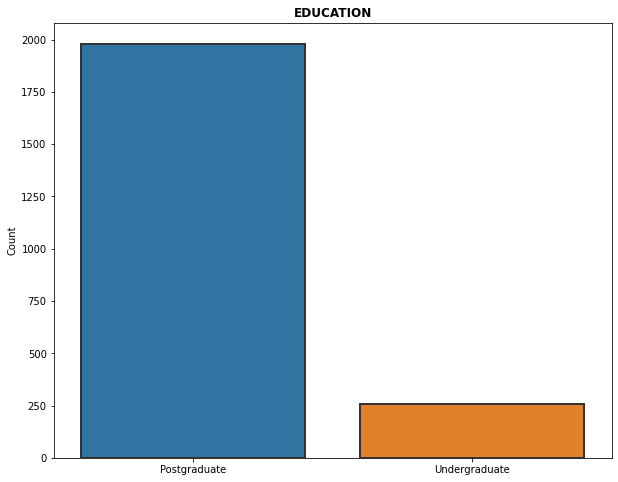

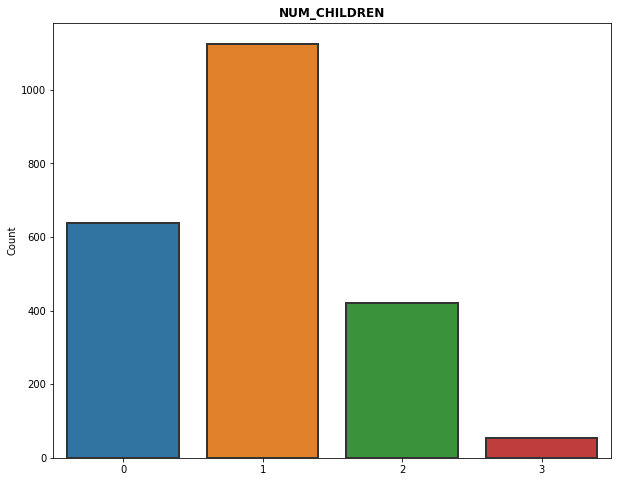

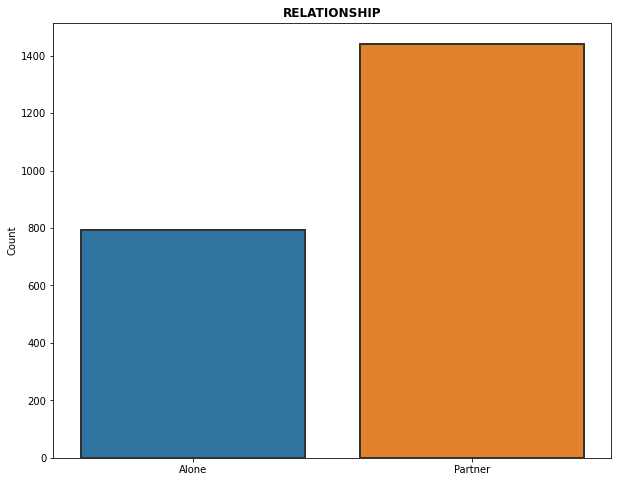

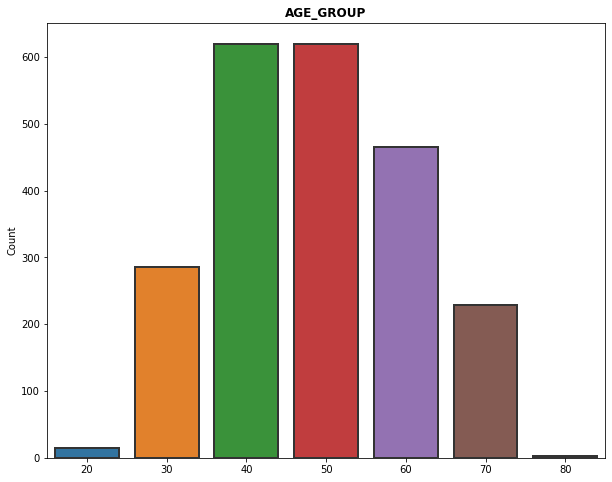

In [22]:
'''Categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical)
'''

for cat in cat_columns:
    plt.figure(figsize = (10,8))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()# .rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

Most of our customers:
- Are in a relationship
- Have graduated or more
- Have 1 child
- Are between 30-70 years

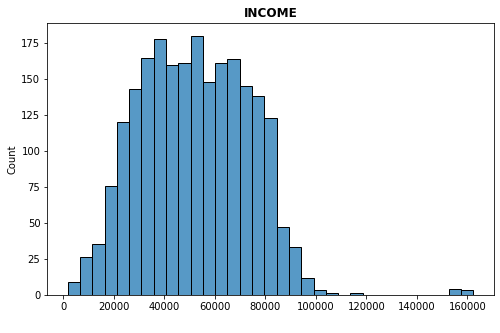

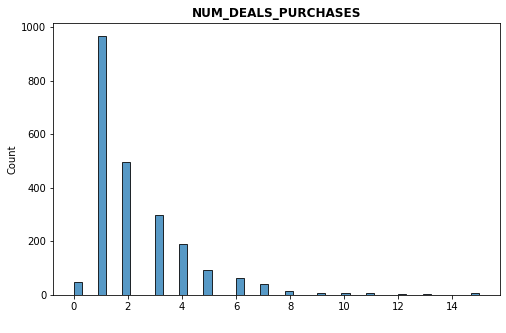

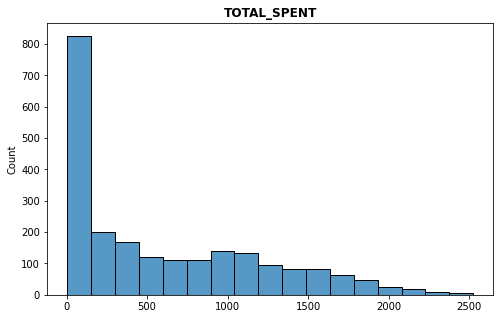

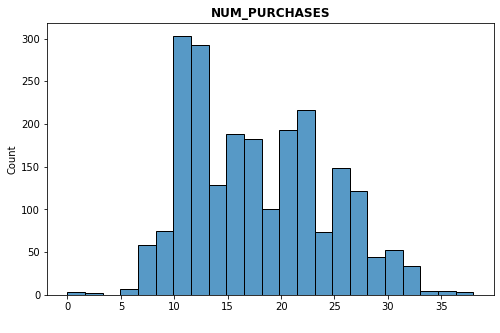

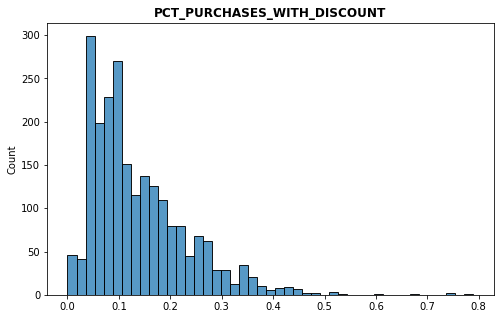

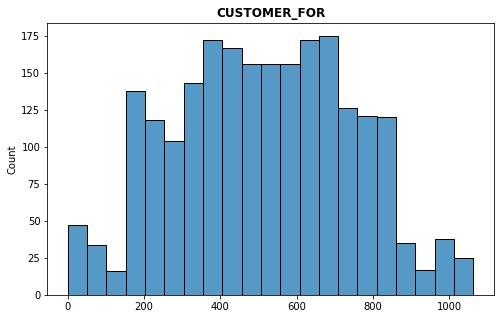

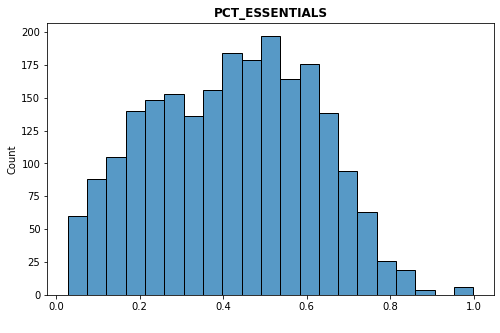

In [23]:
## Distribution of numerical variable

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.histplot(x=num, data=df)
    ax.set_xlabel(" ")
    plt.show()

From the above distributions, it can be concluded that:
- Most people were buying essential products such as food, fish, juice etc.

- A good number of the customers were customers for between 170 to 830 days in the store.

- Most people were buying around 10 to 30 products at a time

- A huge population was spending between 0 and 500 in the unit currency

- With discounts, there was a 0 to 10 % increase in sales/purchases

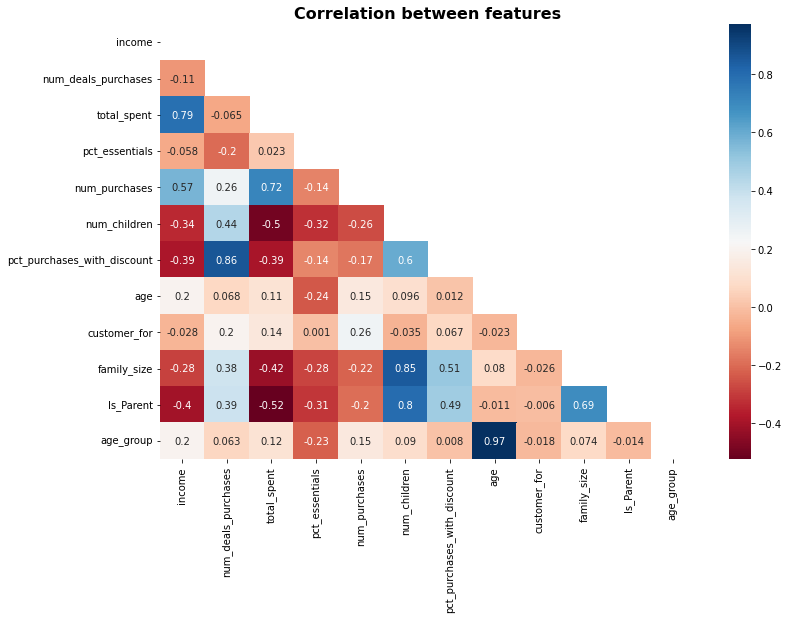

In [24]:
## Correlation Matrix
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12,8))
plt.title('Correlation between features', fontsize = 16, fontweight = 'bold')
sns.heatmap(round(df.corr(),3), annot=True, cmap="RdBu", mask = matrix);

Based on the correlation matrix, we can see a lot of variables that have a strong relationship. Let's take a closer look:

Listing correlating pairs

In [25]:
def corrank(X: df):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False))
corrank(df) # prints a descending list of correlation pair (Max on top)

                                                pairs      corr
59                                   (age, age_group)  0.971484
15  (num_deals_purchases, pct_purchases_with_disco...  0.864827
48                        (num_children, family_size)  0.849840
49                          (num_children, Is_Parent)  0.797991
1                               (income, total_spent)  0.789292
..                                                ...       ...
24         (total_spent, pct_purchases_with_discount) -0.390360
9                                 (income, Is_Parent) -0.401289
27                         (total_spent, family_size) -0.423457
23                        (total_spent, num_children) -0.498579
28                           (total_spent, Is_Parent) -0.523277

[66 rows x 2 columns]


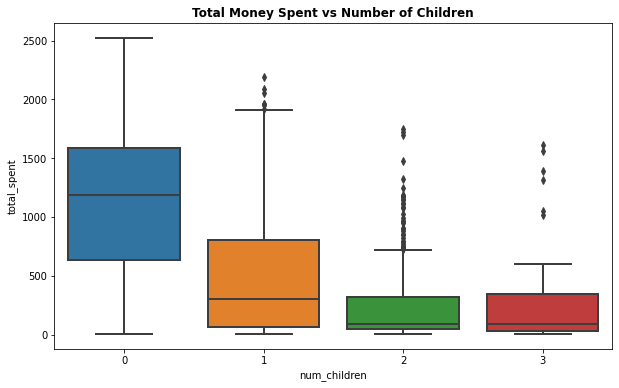

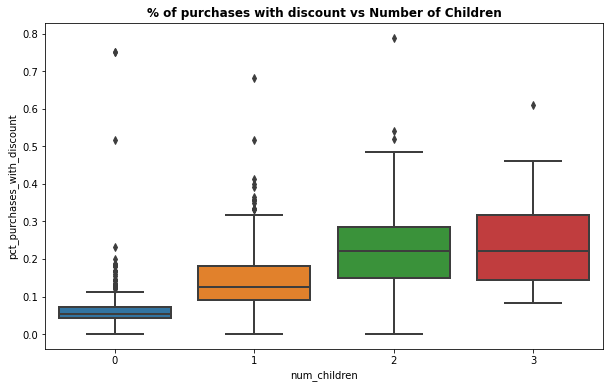

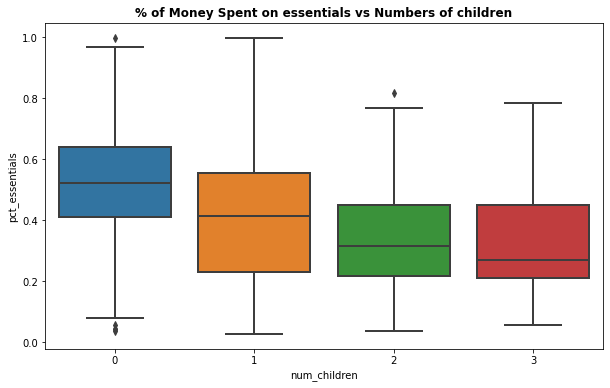

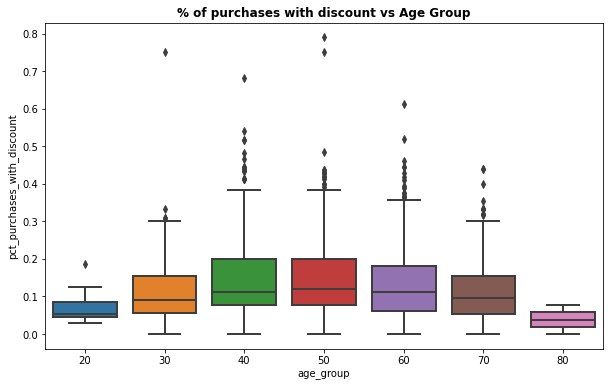

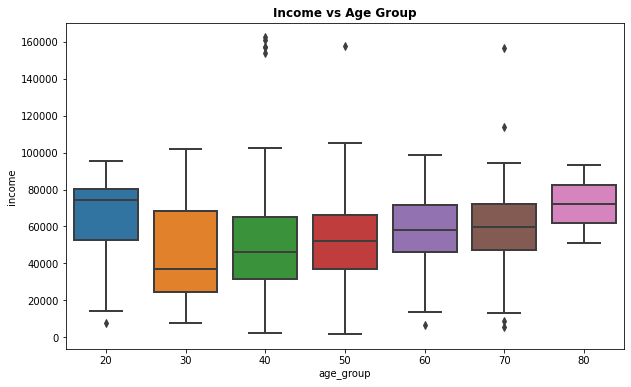

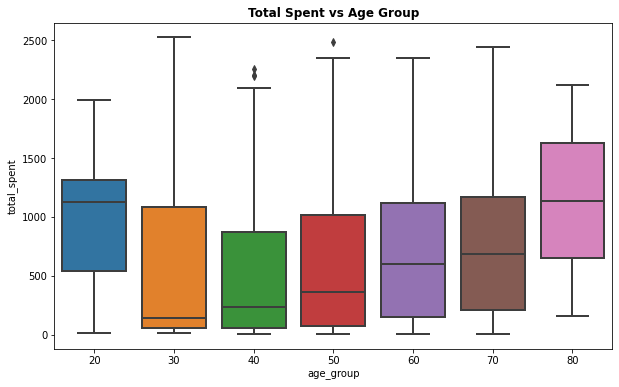

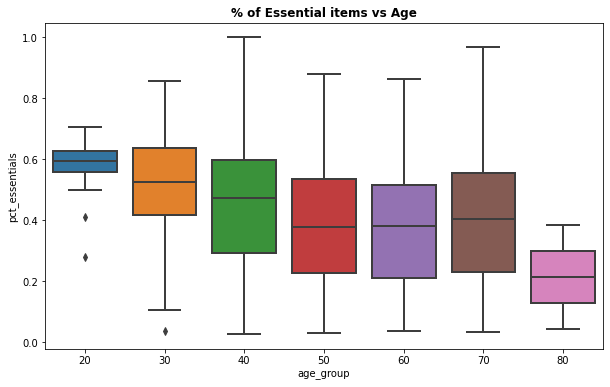

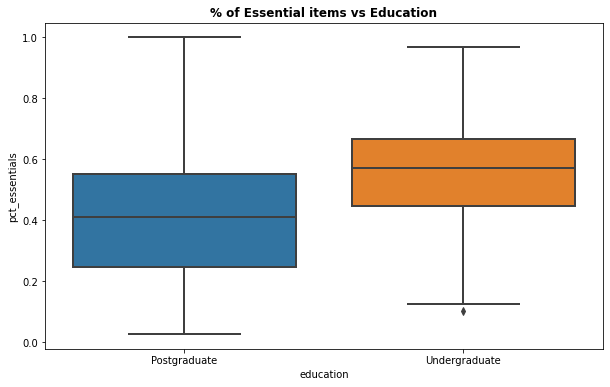

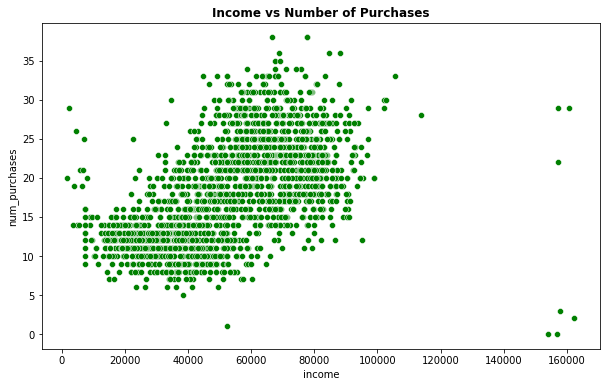

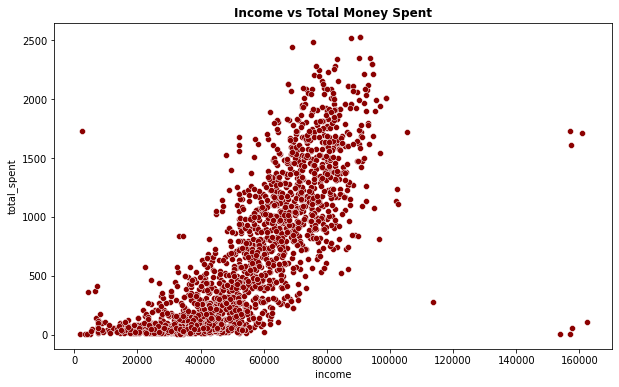

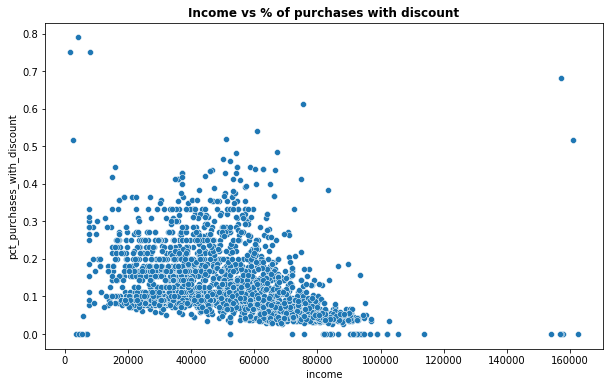

In [26]:
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children', linewidth = 2) ### esquisito
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'income', x = 'age_group', linewidth = 2)
plt.show()


plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'education', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount')
plt.show()


df = df.drop(['age_group', 'customer_for'], axis = 1)

From the visualizations, it can be seen that:

- People with no children: Spend less money, are less inclined to wait for discounts to buy their items and spend more money on essential items (fruits, fish, meat, sweet).

- Older people have a higher income

- People with higher income spend more money, and are less inclined to wait for discounts to buy their items.






# **Data Preprocessing**

In [27]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['education', 'relationship']


In [28]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


## **Scaling data**
---


In [29]:
### Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
education,-0.358780,-0.358780,-0.358780,-0.358780,-0.358780
income,0.288513,-0.262438,0.917992,-1.182621,0.295754
num_deals_purchases,0.348738,-0.168700,-0.686137,-0.168700,1.383614
total_spent,1.680176,-0.962202,0.282541,-0.918994,-0.305762
pct_essentials,0.678727,-0.261669,-0.124932,1.427092,0.687108
num_purchases,1.700416,-1.353871,0.936844,-0.895728,0.173272
num_children,-1.264308,1.395139,-1.264308,0.065416,0.065416
pct_purchases_with_discount,-0.345812,0.905113,-0.996495,0.320003,1.336247
age,1.016868,1.273264,0.333146,-1.290693,-1.034298
relationship,-1.347635,-1.347635,0.742041,0.742041,0.742041


# **Principal Components Analysis (PCA)**

The dataset has a large number of features, many of which are redundant and have some degree of correlation. Using a dimensionality reduction technique is a good way to cut down on the number of features while still retaining a lot of the original dataset's information and lowering the computation cost of the algorithm. 
 
In order to maintain roughly 70%–80% of the variance of the original data, PCA will be performed to determine how many principal components are required. 


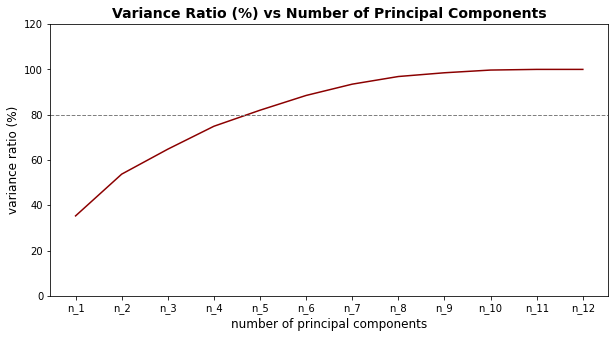

In [31]:
## Determining the number of principal components

## Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100
    
plt.figure(figsize = (10, 5))
plt.plot(list(variance_ratio.keys()), list(variance_ratio.values()), color = 'darkred')
plt.axhline(80, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()

With 4 principal components,  70% to 80% of the variance is explained. That's a good result.

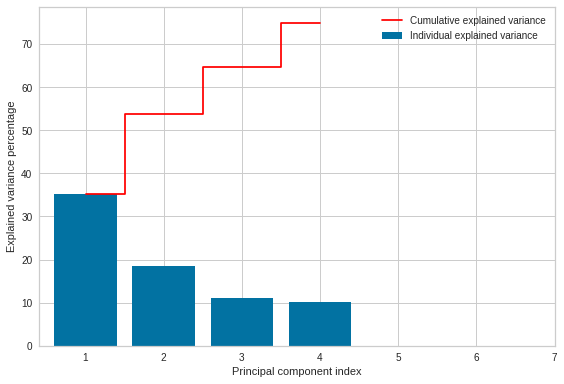

In [49]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 5), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 5), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7])
plt.legend(loc='best')
plt.tight_layout()

4 Principal components explain above >75% of the variance in the dataset

In [94]:
## Applying PCA to create a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = None)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-3.185153,1.100205,1.704953,-0.559138
1,1.934822,-0.281765,0.132512,-1.935986
2,-2.488794,0.402592,-0.867856,0.298119
3,1.287679,-1.840137,-0.129426,0.883722
4,1.268579,0.525909,0.895477,1.344357
5,-0.119609,1.329930,-1.063720,0.153359
6,-0.037402,0.453276,1.730206,-0.526540
7,1.026418,-0.936148,-0.522473,0.484599
8,0.696849,-1.633683,-0.991103,0.374405
9,2.067836,0.231908,-2.229599,-0.995618


A new dataset with the 4 principal components. The next step is, app;ication of k-means on this new dataset.

# **K-Means**

k-means algorithm is going  to create the clusters.

First: Identification of ideal number of clusters.

Done by comparing: the elbow method and the silhouette score.(other methods too)

In the elbow method, WCSS is plotted vs the number of clusters. The WCSS is the sum of squared distance between each point and the centroid in a cluster. Naturally, as the number of clusters increases, this value will always get smaller. 

looking for a value of N from wherethe decrease of WCSS won't be very significant.

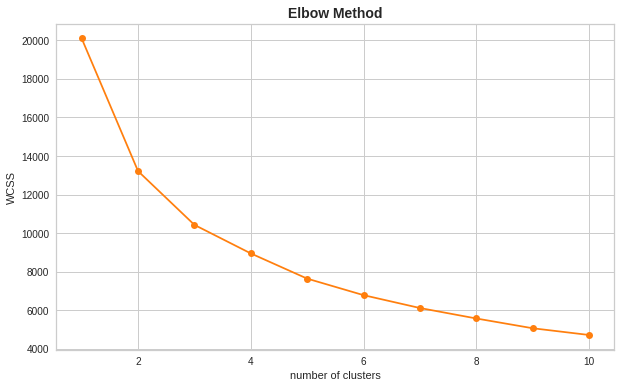

In [95]:
## Determining the ideal number of clusters: Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the curve, it's not really clear what the ideal number of clusters is. 
Confirming with the silhouette scores. From wikipedia: *The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).*

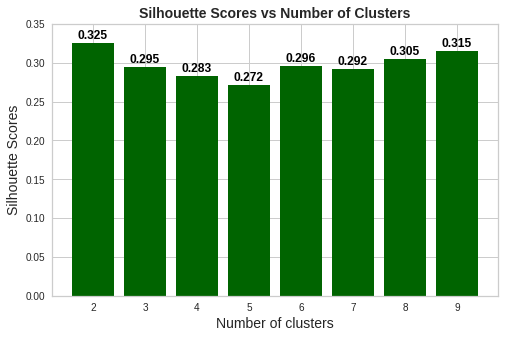

In [96]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=None)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14) 
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

That settles: We are going to use the K-Means with 2 clusters, and add the results to the original dataset.

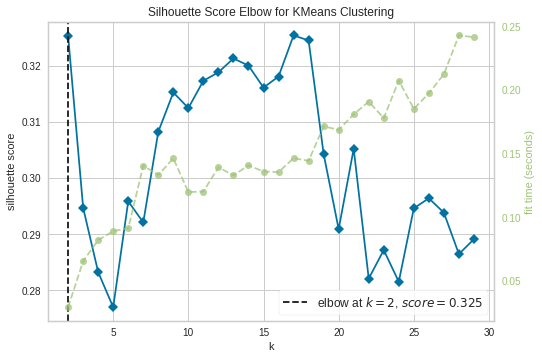

In [97]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

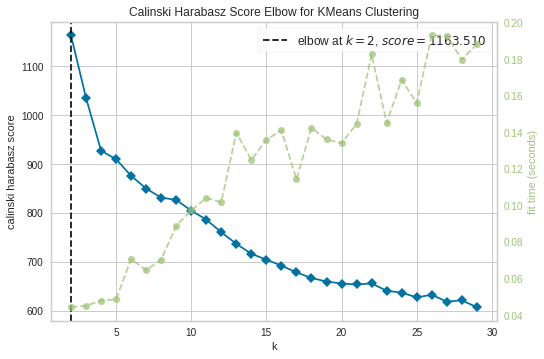

In [98]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

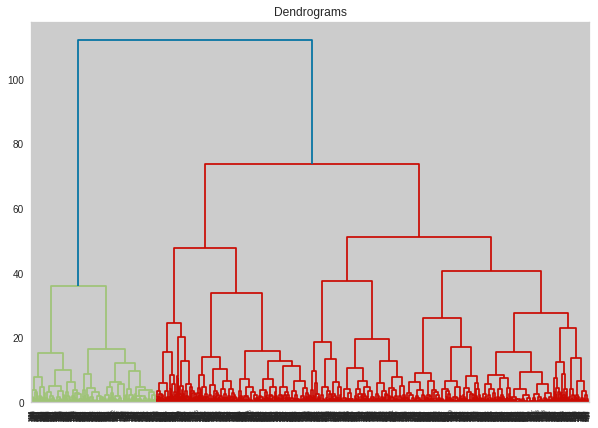

In [99]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))

In [102]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

,education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,family_size,Is_Parent,cluster
0,0,58138.0,3,1617,0.552876,29,0,0.103448,65,0,1,0,1
1,0,46344.0,2,27,0.370370,9,2,0.222222,68,0,3,1,2
2,0,71613.0,1,776,0.396907,24,0,0.041667,57,1,2,0,1
3,0,26646.0,2,53,0.698113,12,1,0.166667,38,1,3,1,2
4,0,58293.0,5,422,0.554502,19,1,0.263158,41,1,3,1,2


## **Cluster Analysis**

Now, let's compare the clusters:

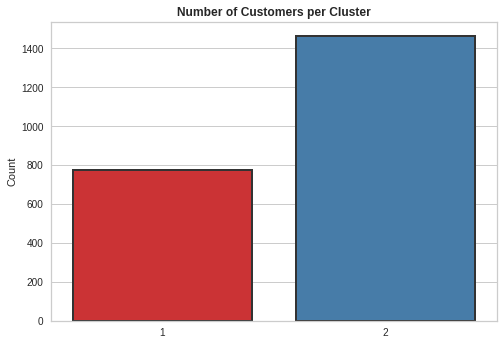

In [103]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)

In [104]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,mean_dataset
education,0.111255,0.115516,0.114043
income,67311.814370,43851.531459,51961.906544
num_deals_purchases,1.235446,2.902256,2.326029
total_spent,1129.450194,329.406015,605.986583
pct_essentials,0.493668,0.382839,0.421153
num_purchases,21.095731,16.158578,17.865385
num_children,0.187581,1.354067,0.950805
pct_purchases_with_discount,0.061530,0.175780,0.136283
age,53.664942,52.804511,53.101968
relationship,0.567917,0.685578,0.644902


In [105]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2
education,0.111255,0.115516
income,67311.814370,43851.531459
num_deals_purchases,1.235446,2.902256
total_spent,1129.450194,329.406015
pct_essentials,0.493668,0.382839
num_purchases,21.095731,16.158578
num_children,0.187581,1.354067
pct_purchases_with_discount,0.061530,0.175780
age,53.664942,52.804511
relationship,0.567917,0.685578


<Figure size 576x576 with 0 Axes>

From the table above, we can have a good idea of the differences between the clusters. At first glance, we can see that the income is very important to divide the users: In the cluster 1, we have a lot of customers with medium income, the cluster 2 we have people with lower-income.

 getting some more insights.

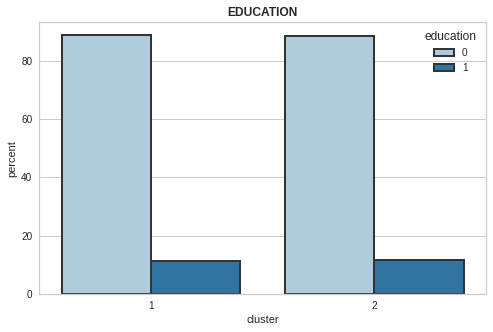

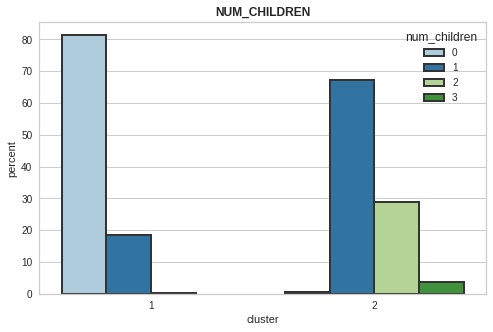

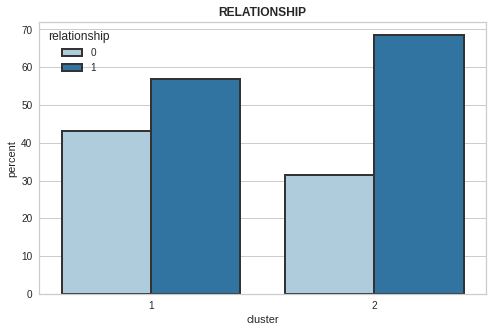

In [106]:
## Categorical Visualizations

cat_columns = ['education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show()    

**Notes:**

- Most of the uin both clusters have attained undergraduate education.
- Most of the people in cluster 1 do not have children while those in cluster 2 are likely to have more than one child.
- A large population in both clusters is in a relationship, however, there are more single people in cluster 1 than in cluster 2.

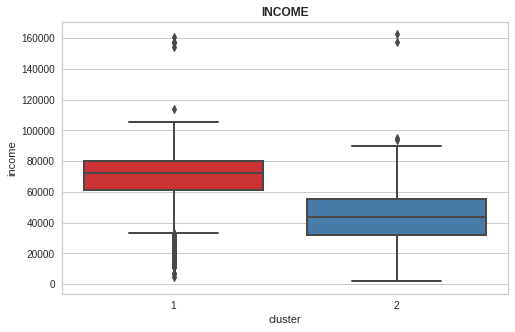

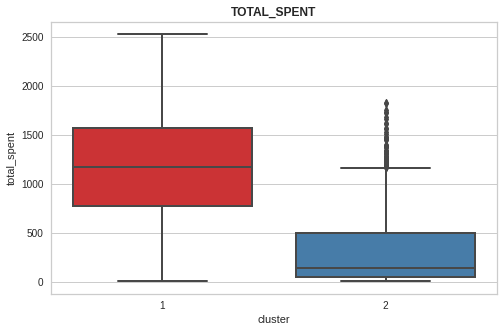

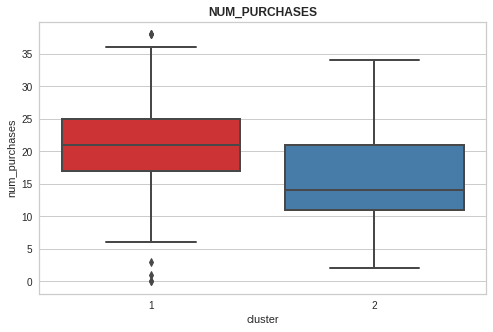

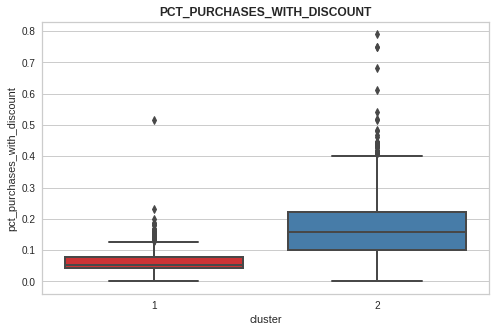

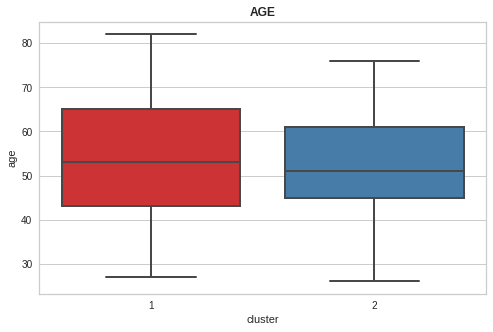

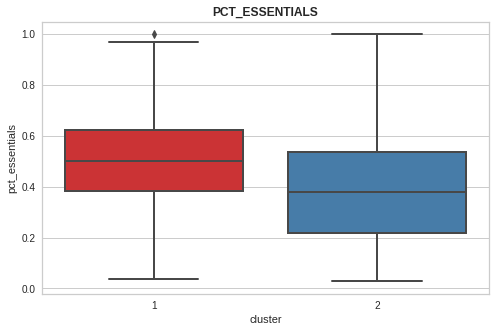

In [107]:
## Numerical Variables

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

### **Notes:**

##### <ins>Income:<ins>
- 1: High Income 
- 2: Low and medium Incomes


#### <ins>Total Spent:<ins> 
- 1: high spent
- 2: low & medium spent


#### <ins>Percentage of Items bought with discount:<ins>
- 2: Buys a lot of items with discount
- 1: Buys a lot of items without discount

#### <ins>Percentage of essential items bought:<ins>
- 1: Buys more of non-essential items (wine + gold)

#### <ins>Age:<ins>
- 2: Are considerably younger than the rest 


    
Other important visualizations:

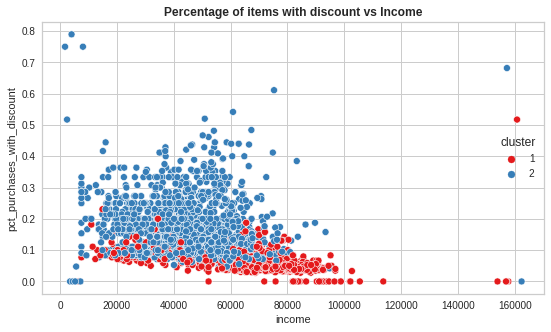

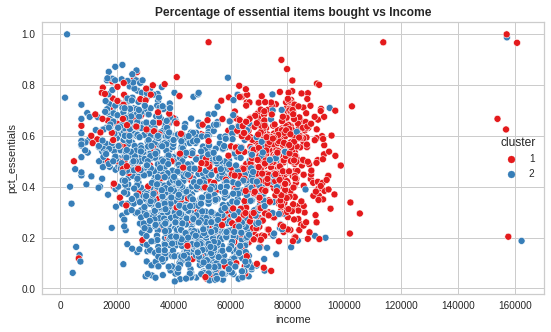

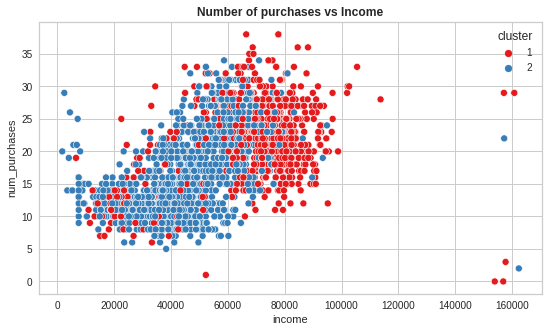

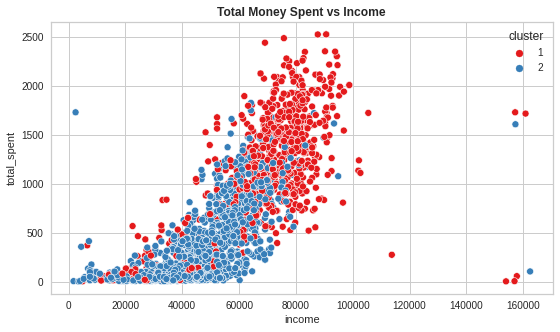

In [108]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'cluster', palette = 'Set1')
plt.show()

# **Conclusions:**
***

**Cluster Profiling**
### Cluster 1:


- About 36% of the customers
- This is a cluster of high earners
- People in this group have either no children or 1 child at most.
- This group spends a lot of money
- People in this cluster do not buy a lot of things with discount
- Prone to buying non-essential items


### Cluster 2:

- Bigger cluster (about 44%)
- People in this cluster earn considerably less.
- Customers in this clusters are not spenders
- Is a little younger than the average of the dataset
- Sensitive to discounted products
- Buys essential products and less likely to buy wine and gold



From these clusters, the customers' behavior is more understandable. The more actionable information is the relation between the customers and the % of items bought with discount:

- It is evident that customers in the cluster 2 buy more of essential items, and are very sensitive to discount.

- On the other hand, people in the cluster 1 doesn't respond very well to discounts.

Therefore, it **might be a good idea to concentrate efforts to send special offers to the people in the cluster 2 (and send premium goods to those in cluster 1).**

## **Challenges**
***
1. Selecting the optimal number of clusters after completing PCA. This is because there are many methods such as: the elbow method, silhouette method etc, all of them were displaying conflicting answers.

2. Determining the accuracy of the clustering.

3. Time constraint to explore the data more.